In [1]:
#import all libraries

import pandas as pd
import numpy as np
from dask import dataframe as dd
import time
import os
from dask.distributed import Client

In [2]:
# clone the github repository https://github.com/USA4UNHCR/data-eng-test , and
# run the script fetch-data. This will create a file 311_data.csv in the working directory.

# Read the 311_data csv file

# Used dask library while reading the 311_data file since the data volume is large

nyc_filepath = r"C:\Users\DShet\Desktop\unhcr\311_data.csv"
fileread_starttime = time.time()
dask_nyc_df = dd.read_csv(nyc_filepath, dtype={'Bridge Highway Name': 'object',
       'Bridge Highway Direction': 'object',
       'Bridge Highway Segment': 'object',
       'Incident Zip': 'object',
       'Landmark': 'object',
       'Road Ramp': 'object',
       'Taxi Company Borough': 'object',
       'Vehicle Type': 'object'}, low_memory=False)
fileread_endtime = time.time()
print("Time taken to read csv with dask: ",(fileread_endtime-fileread_starttime),"sec")
dask_nyc_df.head()

Time taken to read csv with dask:  0.05844902992248535 sec


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,28500741,07/18/2014 12:00:00 AM,07/29/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,11208,PITKIN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674188,-73.880345,"(40.67418819327723, -73.88034454111069)"
1,28500742,07/18/2014 12:47:18 PM,07/18/2014 02:54:11 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226,2112 DORCHESTER ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642115,-73.957996,"(40.642115090113656, -73.95799605750318)"
2,28500743,07/19/2014 01:52:01 AM,07/19/2014 12:37:44 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10473,1520 BRUCKNER BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.823508,-73.877727,"(40.823508077769624, -73.87772749482193)"
3,28500744,07/18/2014 10:34:53 PM,07/19/2014 12:28:20 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10462,1422 WHITE PLAINS ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.836249,-73.863267,"(40.83624928173864, -73.86326678094433)"
4,28500745,07/19/2014 01:02:01 AM,08/07/2014 11:55:10 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,10012,643 BROADWAY,...,NaN,NaN,Other,NaN,NaN,NaN,NaN,40.726634,-73.995768,"(40.72663419742385, -73.99576794105025)"


In [3]:
# Number of complaints that fall in each category
num_complaints = dask_nyc_df['Complaint Type'].value_counts()

In [4]:
# Computation to convert dask dataframe to pandas
computed_df = num_complaints.compute()
computed_df

Noise - Residential               1795446
HEAT/HOT WATER                    1448085
Illegal Parking                   1038150
Street Light Condition             934227
Street Condition                   883721
                                   ...   
Misc. Comments'(select*from...          1
Misc. Comments');declare @q...          1
Misc. Comments')waitfor del...          1
Misc. Comments'+(function()...          1
{!xmlparser v='&lt;!DOCTYPE...          1
Name: Complaint Type, Length: 445, dtype: int64

In [5]:
#information about the dataframe created

print("NYC 311 Dataframe Information:")
nyc_311_info = dask_nyc_df.info()

print("Number of rows for the NYC 311 Dataframe: ", len(dask_nyc_df))

NYC 311 Dataframe Information:
<class 'dask.dataframe.core.DataFrame'>
Columns: 41 entries, Unique Key to Location
dtypes: object(35), float64(5), int64(1)Number of rows for the NYC 311 Dataframe:  21914707


In [6]:
#import libaries to plot the data for data analysis
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

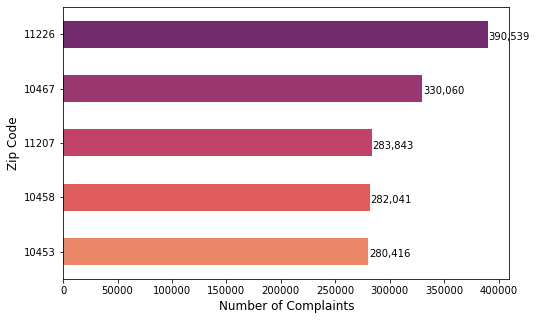

In [7]:
#Top 5 Zipcodes in terms of Complaints

nyc_zipcode = dask_nyc_df['Incident Zip'].value_counts().head(5).sort_values()
nyc_zipcode.index = nyc_zipcode.index.map(str)
color = sns.color_palette("flare", len(nyc_zipcode))

nyc_zipcode.plot(kind = 'barh', figsize = (8, 5), fontsize = 10, color = color)
plt.xlabel('Number of Complaints', fontsize = 12)
plt.ylabel('Zip Code', fontsize = 12)


for index, value in enumerate(nyc_zipcode):   
    label = str(format(int(value), ',')) 
    plt.annotate(label, xy = (value + 500, index - 0.1))



In [8]:
# Check the given (i.e 10011) zipcode belongs to which Borough?
print('10011 ZipCode belongs to ', dask_nyc_df[dask_nyc_df['Incident Zip'] == '10011'].head().iloc[0]['Borough'])

10011 ZipCode belongs to  MANHATTAN


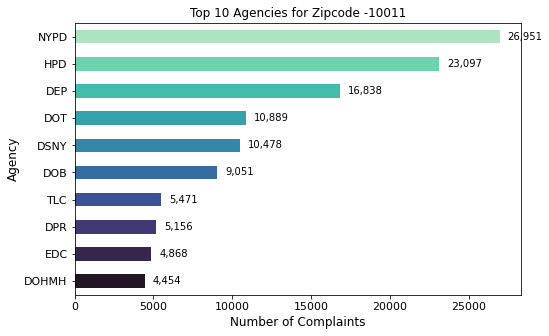

In [9]:
nyc_10011 = dask_nyc_df[(dask_nyc_df['Incident Zip'] == '10011')].reset_index(drop = True)
nyc_10011.head()

nyc_agency = nyc_10011['Agency'].value_counts().head(10).sort_values()
color = sns.color_palette("mako", len(nyc_agency))

nyc_agency.plot(kind = 'barh', title = 'Top 10 Agencies for Zipcode -10011', figsize = (8, 5), fontsize = 11, color = color)
plt.xlabel('Number of Complaints', fontsize = 12)
plt.ylabel('Agency', fontsize = 12)


for index, value in enumerate(nyc_agency):   
    label = str(format(int(value), ',')) 
    plt.annotate(label, xy = (value + 500, index - 0.1))

In [10]:
# Check the given (i.e 11217) zipcode belongs to which Borough?
print('11217 ZipCode belongs to ', dask_nyc_df[dask_nyc_df['Incident Zip'] == '11217'].head().iloc[0]['Borough'])

11217 ZipCode belongs to  BROOKLYN


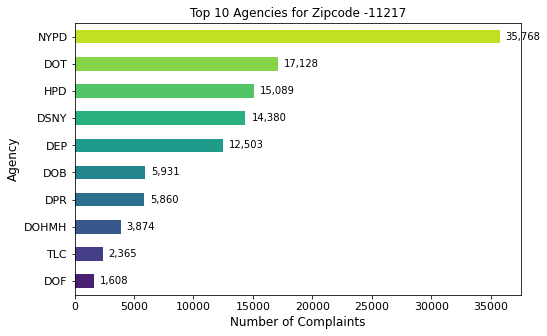

In [11]:
nyc_11217 = dask_nyc_df[(dask_nyc_df['Incident Zip'] == '11217')].reset_index(drop = True)
nyc_11217.head()

nyc_agency = nyc_11217['Agency'].value_counts().head(10).sort_values()
color = color = sns.color_palette("viridis",len(nyc_agency))

nyc_agency.plot(kind = 'barh', title = 'Top 10 Agencies for Zipcode -11217', figsize = (8, 5), fontsize = 11, color = color)
plt.xlabel('Number of Complaints', fontsize = 12)
plt.ylabel('Agency', fontsize = 12)


for index, value in enumerate(nyc_agency):   
    label = str(format(int(value), ',')) 
    plt.annotate(label, xy = (value + 500, index - 0.1))

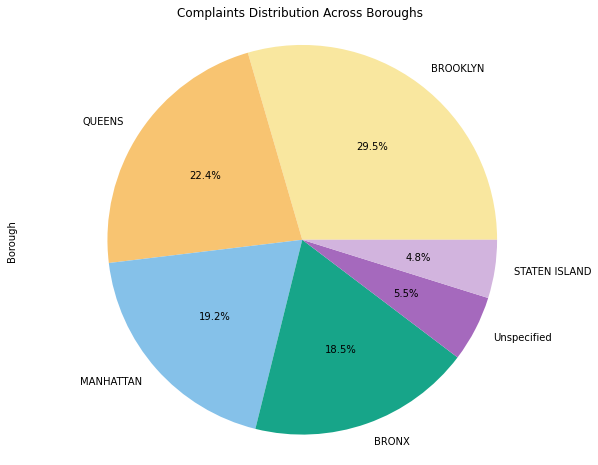

In [14]:
# Complaint distribution Across Boroughs using pie chart
colors = ['#f9e79f','#f8c471','#85c1e9','#17a589','#a569bd','#d2b4de','#cc566a']
(dask_nyc_df['Borough'].value_counts()).head(6).plot(kind='pie',autopct='%1.1f%%',colors = colors,figsize = (10,8))
plt.axis('equal')
plt.title('Complaints Distribution Across Boroughs')
plt.show()